## **GROUP 18: CUSTOMER SHOPPING CHURN**

1. Devraj Chauhan
2. Sumanth Reddy Baddala
3. Adla Chandana
4. Srilakshmi Ankenagari
5. Premchand Kothapali



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


# Load data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the data
df = pd.read_csv("/content/drive/MyDrive/customer_shopping_data.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Display the first few rows of the dataframe, its shape, and check for missing values
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [ ]:
df.shape

(99457, 10)

In [ ]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [ ]:
# Get an overview of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB
None


In [ ]:
# Summary statistics for numerical variables
print(df.describe())

                age      quantity         price
count  99457.000000  99457.000000  99457.000000
mean      43.427089      3.003429    689.256321
std       14.990054      1.413025    941.184567
min       18.000000      1.000000      5.230000
25%       30.000000      2.000000     45.450000
50%       43.000000      3.000000    203.300000
75%       56.000000      4.000000   1200.320000
max       69.000000      5.000000   5250.000000


In [ ]:
# Explore categorical variables
print(df['gender'].value_counts())
print(df['payment_method'].value_counts())
print(df['shopping_mall'].value_counts())

gender
Female    59482
Male      39975
Name: count, dtype: int64
payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64
shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64


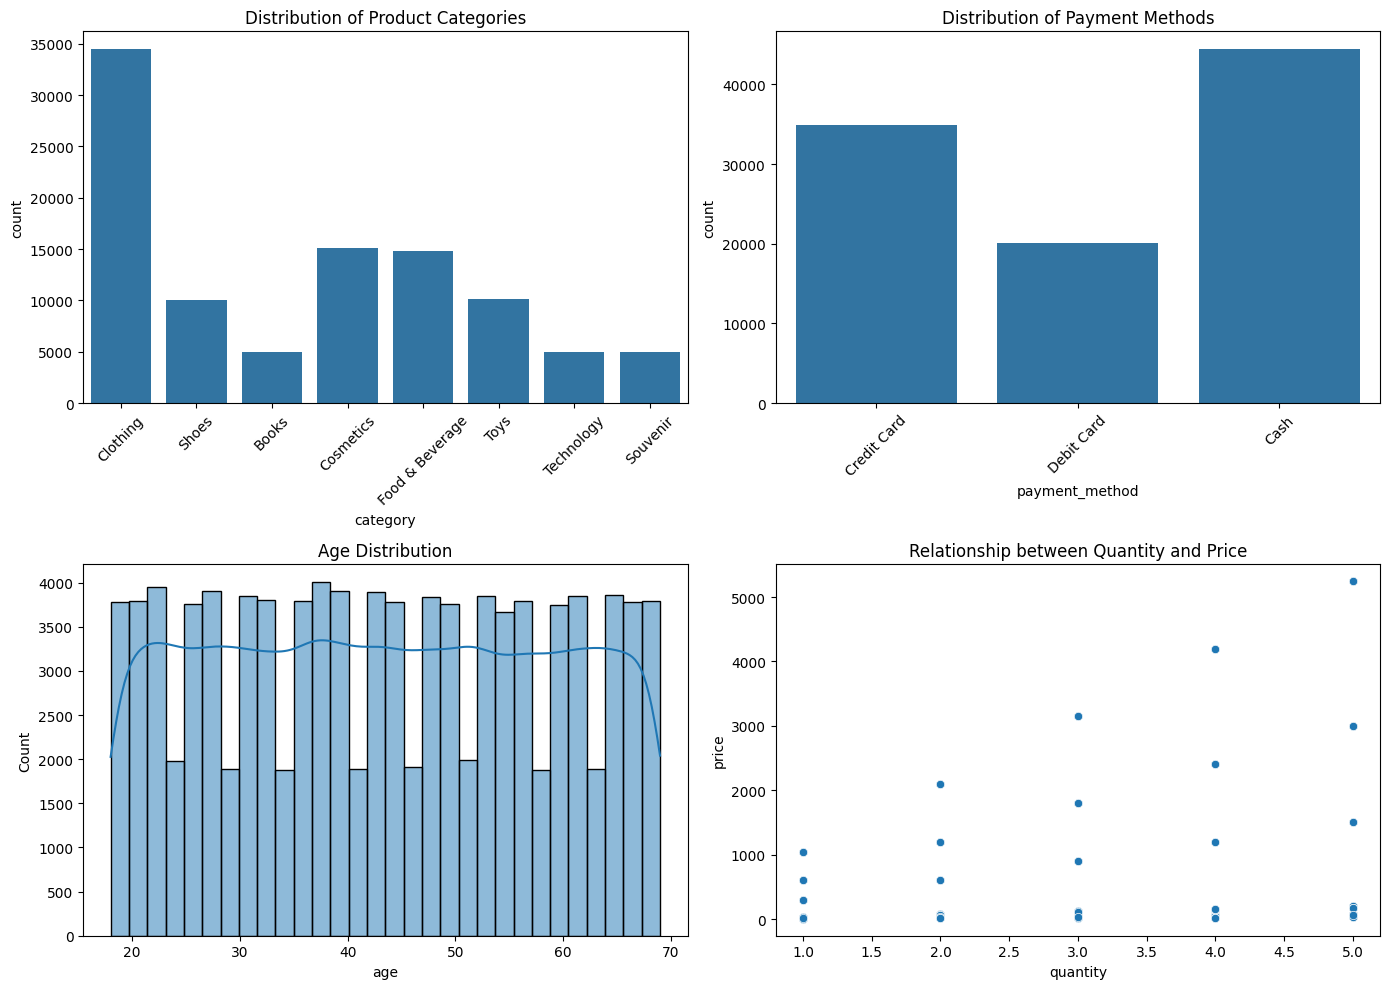

In [ ]:
# Set up the visualization layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plotting distributions of categorical data
sns.countplot(data=df, x='category', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Product Categories')
axes[0, 0].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x='payment_method', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Payment Methods')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plotting distribution of age
sns.histplot(data=df, x='age', bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Age Distribution')

# Relationship between price and quantity
sns.scatterplot(data=df, x='quantity', y='price', ax=axes[1, 1])
axes[1, 1].set_title('Relationship between Quantity and Price')

plt.tight_layout()
plt.show()


Here are the visualizations from the Exploratory Data Analysis (EDA):

Distribution of Product Categories: The dataset contains various product categories. The plot shows the count of transactions per category.

Distribution of Payment Methods: It shows the frequency of different payment methods used by customers.

Age Distribution: This histogram shows the distribution of customer ages, providing insights into the demographic spread.

Relationship between Quantity and Price: The scatterplot explores how the quantity of products purchased relates to their price. It seems there isn't a straightforward relationship, suggesting that higher quantities do not necessarily correlate with higher or lower prices uniformly across the dataset.

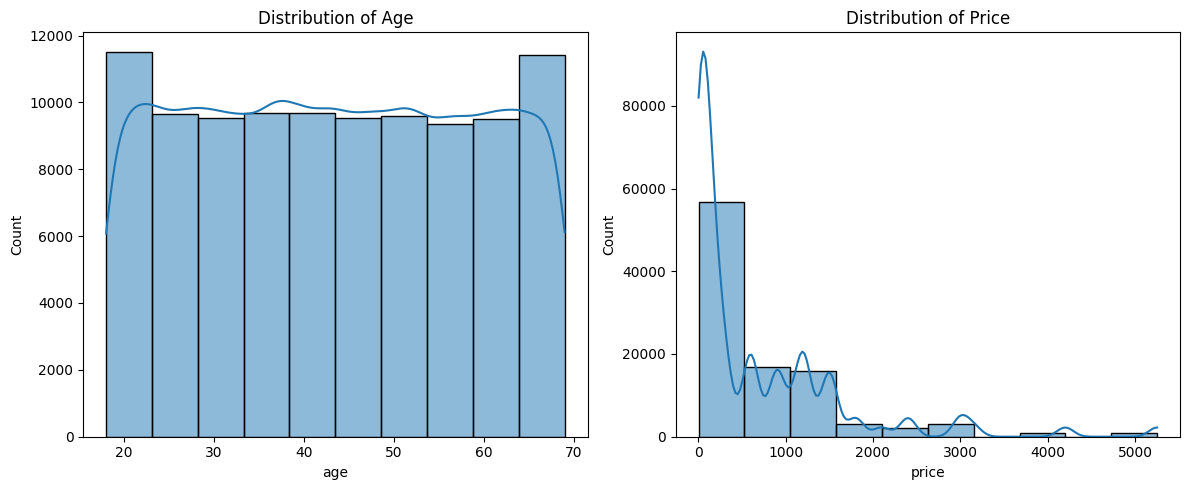

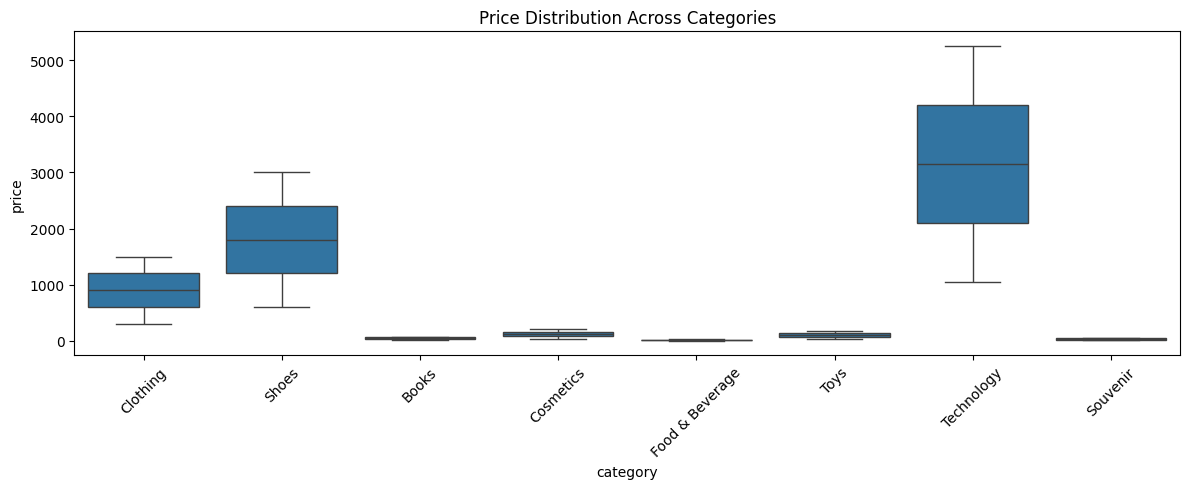

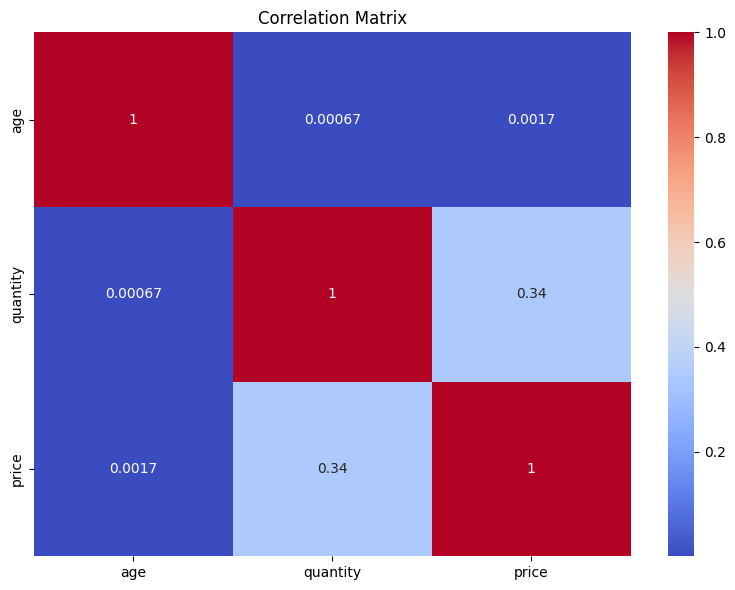

In [ ]:
# Distribution Plots for Age and Price
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

sns.histplot(df['age'], bins=10, kde=True, ax=axs[0])
axs[0].set_title('Distribution of Age')

sns.histplot(df['price'], bins=10, kde=True, ax=axs[1])
axs[1].set_title('Distribution of Price')

plt.tight_layout()
plt.show()

# Boxplot for Prices in Different Categories
plt.figure(figsize=(12, 5))
sns.boxplot(x='category', y='price', data=df)
plt.title('Price Distribution Across Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Selecting only numeric columns for correlation matrix
numeric_data = df.select_dtypes(include=[np.number])  # np.number to filter numeric types
correlation_matrix = numeric_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


In [ ]:
# Assuming the DataFrame is loaded as df
# Convert 'invoice_date' to datetime specifying the day-first format
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)

# Define a cutoff date for churn, e.g., no purchase in the last 90 days of data available
cutoff_date = df['invoice_date'].max() - pd.Timedelta(days=90)

# Create a churn column based on last purchase
df['churn'] = df.groupby('customer_id')['invoice_date'].transform(max) < cutoff_date
df['churn'] = df['churn'].astype(int)  # Convert boolean to 0/1

# Continue with your data preparation and modeling
# One-hot encoding for categorical data
df_encoded = pd.get_dummies(df, columns=['gender', 'category', 'payment_method', 'shopping_mall'], drop_first=True)

# Dropping unnecessary columns
df_clean = df_encoded.drop(['invoice_no', 'customer_id', 'invoice_date'], axis=1)

# Splitting the dataset into features and target variable
X = df_clean.drop('churn', axis=1)  # Features
y = df_clean['churn']  # Target variable

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Confirm the setup
print(X_train.head())


       age  quantity    price  gender_Male  category_Clothing  \
89030   33         4  2400.68         True              False   
68537   40         4  2400.68         True              False   
36280   36         3   107.52         True              False   
68292   22         3    15.69        False              False   
15012   27         1   300.08        False               True   

       category_Cosmetics  category_Food & Beverage  category_Shoes  \
89030               False                     False            True   
68537               False                     False            True   
36280               False                     False           False   
68292               False                      True           False   
15012               False                     False           False   

       category_Souvenir  category_Technology  ...  payment_method_Debit Card  \
89030              False                False  ...                      False   
68537              F

In [ ]:
# Print the column names of the DataFrame
print(df.columns)

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall', 'churn'],
      dtype='object')


In [ ]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,churn
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,1
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,1
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,1
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,1
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,1


Accuracy: 0.8406394530464508
Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.06      0.08      3397
           1       0.89      0.94      0.91     26441

    accuracy                           0.84     29838
   macro avg       0.50      0.50      0.50     29838
weighted avg       0.80      0.84      0.82     29838



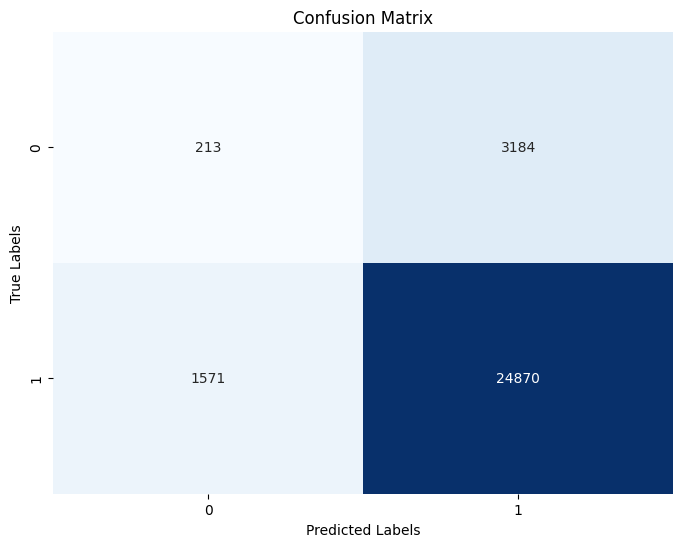

In [ ]:

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

The results indicate that while the overall accuracy of your model is quite high at approximately 84%, the performance is significantly skewed towards the majority class (customers who have not churned). This is evident from the precision, recall, and F1-score for the churned class (1), which are much lower than those for the not churned class (0).

**Key Observations:**

Precision for Churned Class (1): High, indicating that when the model predicts churn, it is correct most of the time.
Recall for Churned Class (1): Also high, showing that the model is able to identify most of the actual churn cases.
Imbalance in Data: The very low metrics for the minority class (0) indicate a possible class imbalance, which can lead the model to predominantly predict the majority class.

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
Accuracy: 0.7849386688115826
Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.14      0.13      3397
           1       0.89      0.87      0.88     26441

    accuracy                           0.78     29838
   macro avg       0.50      0.51      0.50     29838
weighted avg       0.80      0.78      0.79     29838



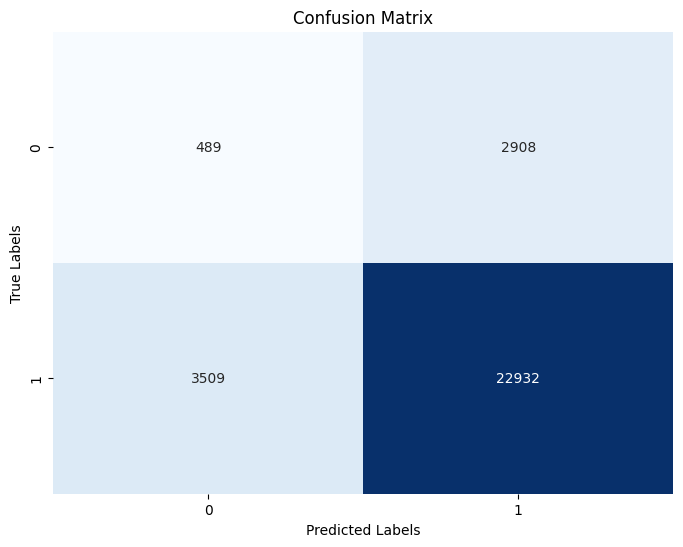

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Oversampling with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define hyperparameters for randomized search
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform Randomized Search CV
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters found by Randomized Search
print("Best Parameters:", random_search.best_params_)

# Use the best estimator from randomized search
best_rf_classifier = random_search.best_estimator_

# Predict on the test set
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Accuracy: 0.8861518868556874
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00      3397
           1       0.89      1.00      0.94     26441

    accuracy                           0.89     29838
   macro avg       0.94      0.50      0.47     29838
weighted avg       0.90      0.89      0.83     29838



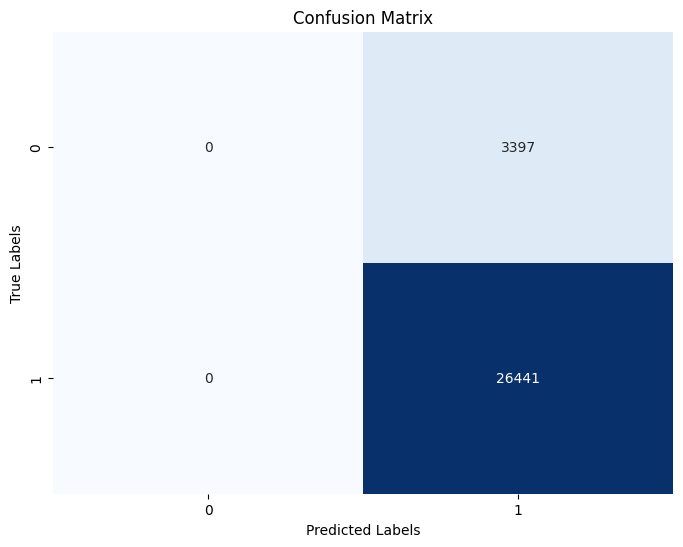

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

# Ignore warnings
warnings.filterwarnings("ignore", category=Warning)

# Assuming df is your DataFrame and preprocessing steps are already applied
# Prepare your features (X) and target (y) variables
X = df_clean.drop('churn', axis=1)  # Assuming df_clean is your preprocessed DataFrame
y = df_clean['churn']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gradient Boosting Classifier
gbm_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training data
gbm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = gbm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))  # Set zero_division to 1

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In summary, the first approach trains a Random Forest Classifier on the imbalanced dataset without any preprocessing or hyperparameter tuning, leading to suboptimal performance for churn prediction. The second approach addresses class imbalance using SMOTE and optimizes model performance through hyperparameter tuning, resulting in better performance metrics for both classes.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score

gbm_classifier = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    subsample=0.8,
    max_features='sqrt',
    min_samples_leaf=50,
    min_samples_split=500
)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

gbm_classifier.fit(X_train_resampled, y_train_resampled)
y_pred = gbm_classifier.predict(X_test)


roc_auc = roc_auc_score(y_test, gbm_classifier.predict_proba(X_test)[:, 1])
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.5050157048963563


In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

smote_bl = BorderlineSMOTE(random_state=42, kind='borderline-1')
X_train_resampled, y_train_resampled = smote_bl.fit_resample(X_train, y_train)


In [ ]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train))
xgb_classifier.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, auc

# Assuming your model is named 'gbm_classifier' and has been fitted
# Predict probabilities for the test set
probs = gbm_classifier.predict_proba(X_test)[:, 1]  # Get probabilities of the positive class

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Calculate AUC of the precision-recall curve
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", pr_auc)


Precision-Recall AUC: 0.8887651792300555


In [ ]:
# Find the optimal threshold
optimal_idx = np.argmax(recall - precision)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)

# Apply threshold to class predictions
predicted_classes = (probs >= optimal_threshold).astype(int)

Optimal Threshold: 0.4589989475277539


Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.00      0.00      3397
           1       0.89      1.00      0.94     26441

    accuracy                           0.89     29838
   macro avg       0.53      0.50      0.47     29838
weighted avg       0.81      0.89      0.83     29838



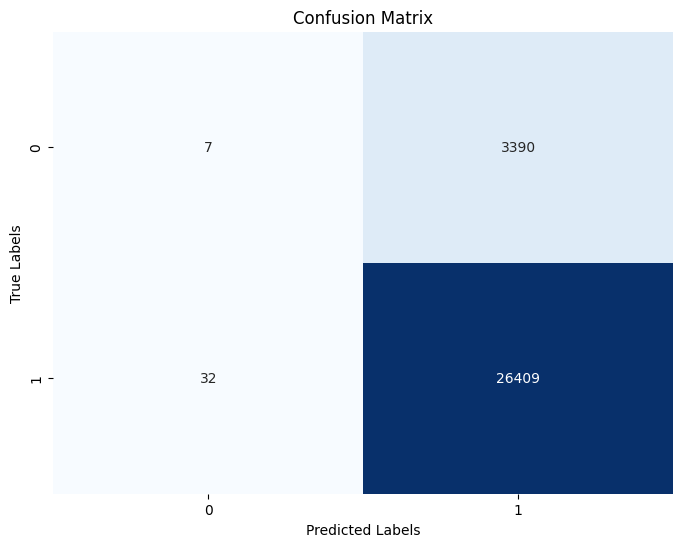

In [ ]:
# Applying the optimal threshold to classify customers based on churn probability
predicted_classes = (probs >= 0.459).astype(int)

# Evaluate the final model performance
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, predicted_classes))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
